Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


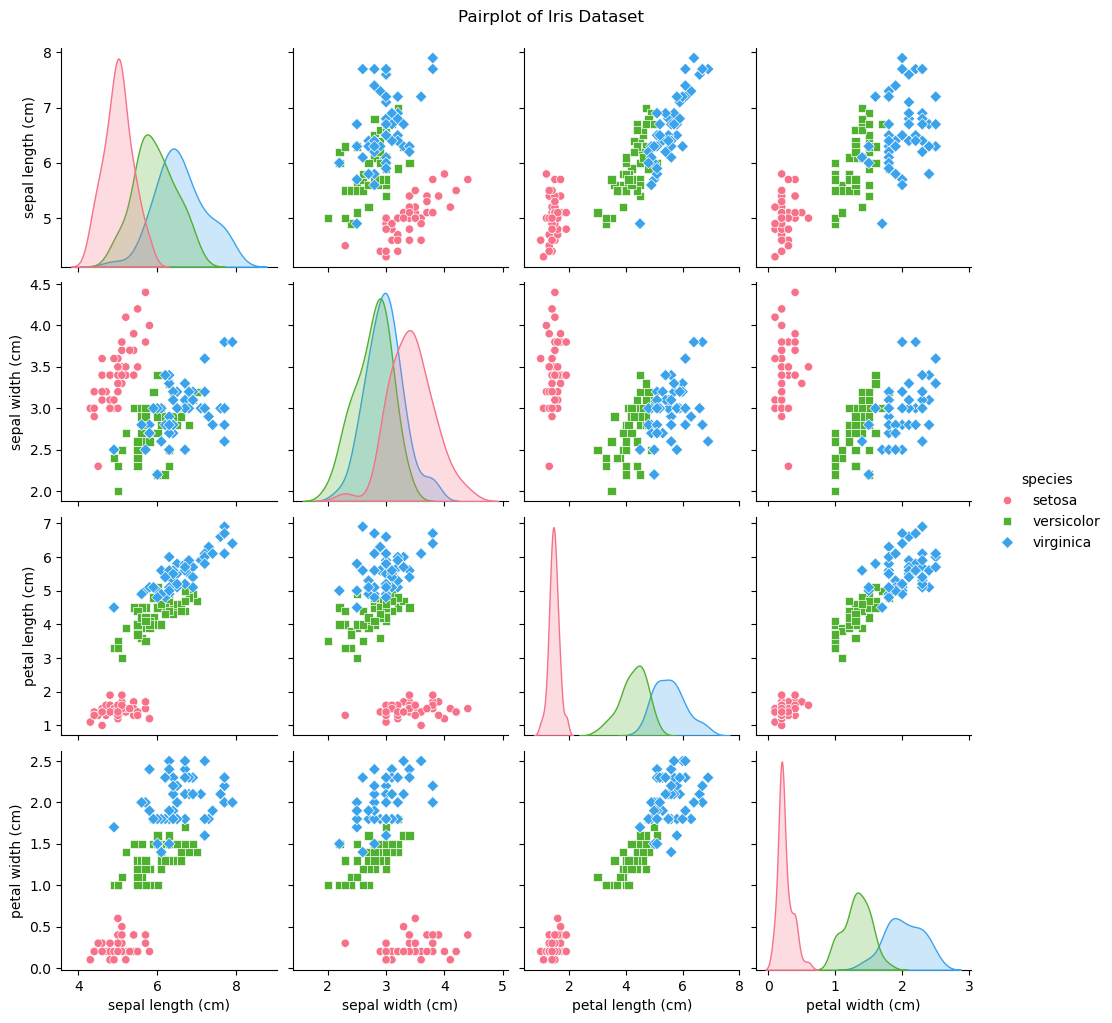

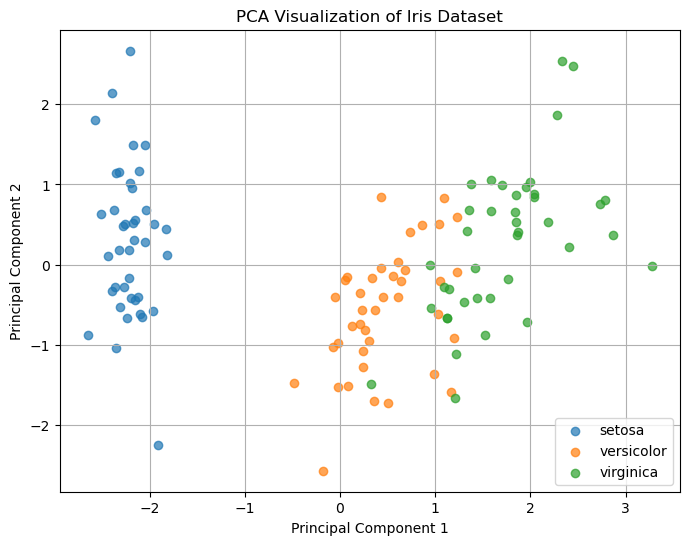


Evaluating Random Forest Model:

Random Forest Accuracy: 0.90
Classification Report for Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix for Random Forest:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Evaluating KNN Model:

KNN Accuracy: 0.93
Classification Report for KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.9

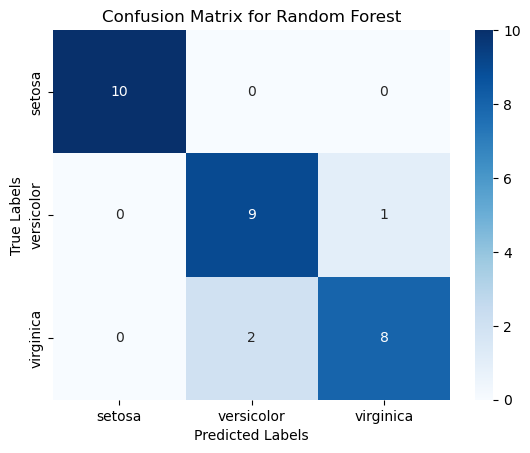

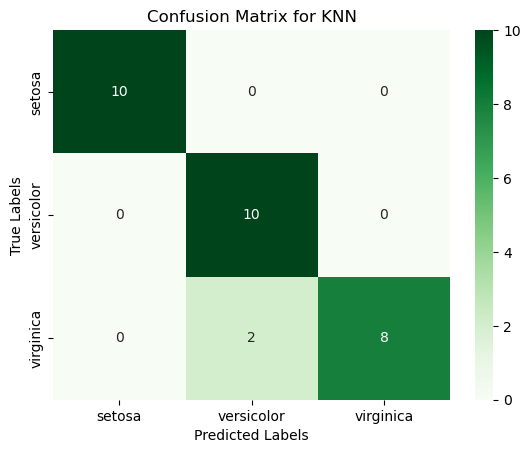

C:\Users\jagda\AppData\Local\Temp\ipykernel_16396\747992682.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette="viridis")


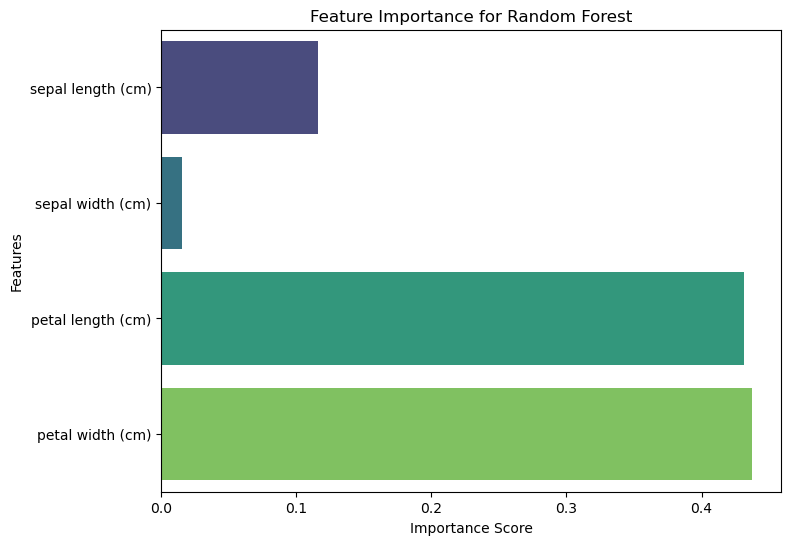


Random Forest Cross-Validation Accuracy: 0.97 ± 0.02


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Dataset Overview
print("Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df['species'].value_counts())

# Visualize the Data (Pairplot)
sns.pairplot(df, hue='species', palette='husl', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
for species, label in zip(target_names, [0, 1, 2]):
    plt.scatter(X_train_pca[y_train == label, 0], 
                X_train_pca[y_train == label, 1], 
                label=species, alpha=0.7)
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train a K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate Models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred, target_names=target_names)}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    return y_pred

print("\nEvaluating Random Forest Model:")
rf_predictions = evaluate_model(rf_model, X_test, y_test, "Random Forest")

print("\nEvaluating KNN Model:")
knn_predictions = evaluate_model(knn_model, X_test, y_test, "KNN")

# Visualize Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature Importance for Random Forest
importance = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=feature_names, palette="viridis")
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Cross-Validation Scores
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"\nRandom Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")